```

    Generate artificial classification data.

    1. Generate two classes with normal distributed features.
    2. Transform one class to log-normal distributed features.
    3. Shift one class to enlarge effect size.
    4. Generate random features.
    5. Generate pseudo class features.
    6. Generate pseudo classes.
    7. Generate data frame.
    8. Drop perfectly separated features.
    9. Save data frame as csv.
The number of informative features is the number of features that are not random features and not pseudo class features.


To know: 
Classification
training data (matrix)
labels (vector)
Samples (rows)
Features (columns)
Biomarkers (biological background)
Feature selection
Feature extraction
Feature engineering
Feature importance
Statistical distributions (normal, log-normal)
Effect size
Application areas of artificial data
Clustering/ Cluster
CSV

```

In [18]:
number_of_samples_per_class = 15
number_of_informative_features = 30  # TODO assert complete number of features?
number_of_pseudo_class_features = 10
number_of_random_features = 10000

In [19]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

warnings.filterwarnings("ignore", category=IterationLimitWarning)

Generate complete class 1

In [20]:
class1_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class1_np = artificial_data_generator_tools.build_class(class_features_list=[class1_np])

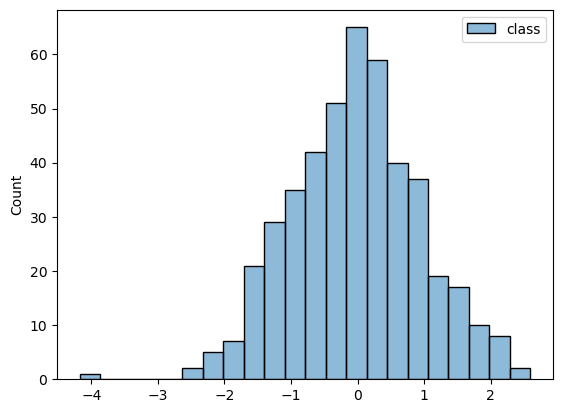

In [21]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_np)

In [22]:
log_normal_distributed_class1_np = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_np=class1_np
    )
)
assert log_normal_distributed_class1_np.shape[1] == number_of_informative_features

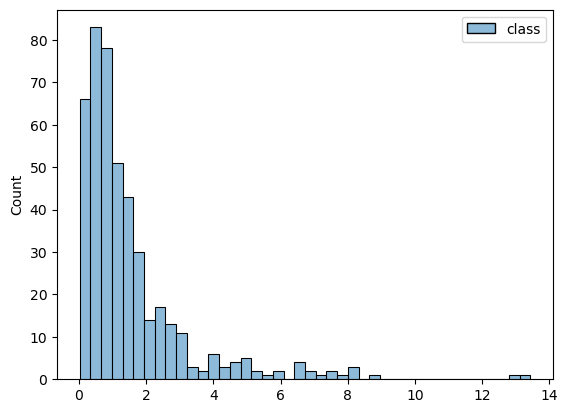

In [23]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_np,
)

Generate class 2

In [24]:
class2_np = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class2_np = artificial_data_generator_tools.build_class(class_features_list=[class2_np])

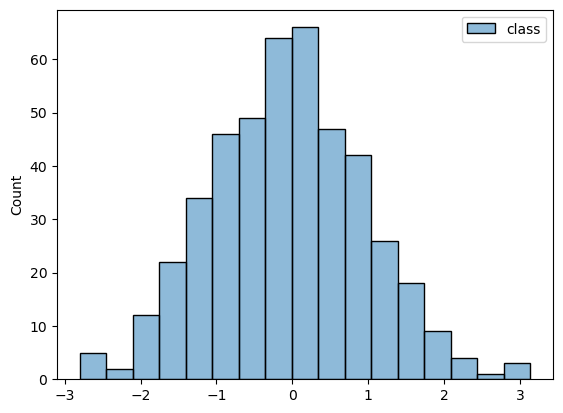

In [25]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_np)

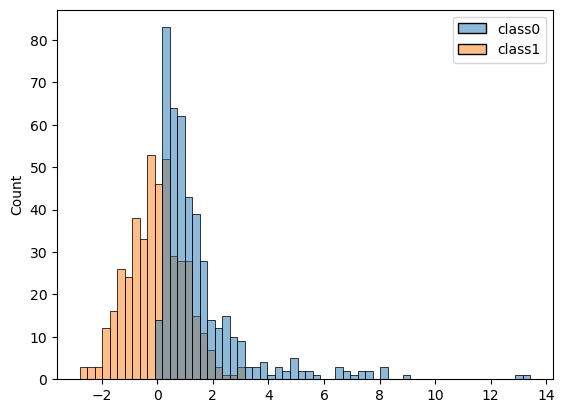

In [26]:
artificial_data_generator_tools.plot_distributions_of_all_classes([log_normal_distributed_class1_np, class2_np])

In [27]:
shifted_class1_np = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_np, effect_size=0.5
)

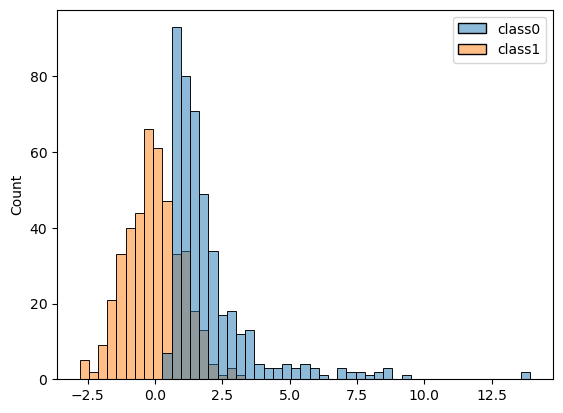

In [28]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_np, class2_np])

In [30]:
indices_of_perfectly_separated_features = artificial_data_generator_tools.find_perfectly_separated_features(
    [shifted_class1_np, class2_np]
)

Feature 0 perfectly separates class 0 and class 1
Feature 1 perfectly separates class 0 and class 1
Feature 5 perfectly separates class 0 and class 1
Feature 7 perfectly separates class 0 and class 1
Feature 10 perfectly separates class 0 and class 1
Feature 11 perfectly separates class 0 and class 1
Feature 18 perfectly separates class 0 and class 1
Feature 21 perfectly separates class 0 and class 1
Feature 28 perfectly separates class 0 and class 1


In [31]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_np, class2_np],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
print(artificial_data_df.shape)

(30, 10041)


In [32]:
separated_artificial_data_df = artificial_data_generator_tools.drop_perfectly_separated_features(
    list_of_perfectly_separated_features=indices_of_perfectly_separated_features, data_df=artificial_data_df
)
print(separated_artificial_data_df.shape)

# check if first column is class label
assert separated_artificial_data_df.columns[0] == "label"

(30, 10032)


In [33]:
# number of informative features
number_of_informative_separated_features = number_of_informative_features - len(indices_of_perfectly_separated_features)
print(number_of_informative_separated_features)

21


In [34]:
# save csv
separated_artificial_data_df.to_csv(
    f"../examples/data/separated_i{number_of_informative_separated_features}.csv", index=False
)